In [1]:
import sys
import os
import numpy as np

In [2]:
from ase.io import iread

#read in the trajectory
traj = iread('MD_3strcs.log')

atoms1 = next(traj)

print(atoms1.get_positions())
print(atoms1.cell)

[[ 8.51316e+00  5.04403e-01  3.21475e+00]
 [ 3.66330e+00  3.54570e+00  3.41949e+00]
 [ 4.62085e+00  7.32969e+00  3.21517e+00]
 [-7.59680e-02  4.70102e+00  2.97019e+00]
 [ 1.63245e+00  1.38878e+00  5.76342e+00]
 [ 6.15396e+00  2.75837e+00  5.81662e-01]
 [ 1.73176e+00  1.64181e+00  9.29662e-02]
 [ 6.53035e+00  2.56943e+00  5.82862e+00]
 [ 4.32872e+00  8.50995e+00  4.36546e-02]
 [ 1.74430e+01  2.38400e-01  2.70690e+00]
 [ 1.26014e+01  4.04931e+00  2.94104e+00]
 [ 1.32657e+01  8.58790e+00 -1.23669e-01]
 [ 9.07129e+00  4.36145e+00  6.20840e+00]
 [ 1.33779e+01  8.35635e+00  6.02251e+00]
 [ 1.32887e+01  7.85388e+00  3.01358e+00]
 [ 8.82228e+00  4.71301e+00  3.02463e+00]
 [ 1.07890e+01  1.66202e+00  5.94228e+00]
 [ 1.54078e+01  2.47065e+00  2.07890e-01]
 [ 1.05641e+01  1.39291e+00  1.45245e-01]
 [ 1.51067e+01  2.75726e+00  5.72869e+00]
 [ 4.51914e+00  7.56770e-02  6.16559e+00]
 [ 8.22744e+00  8.43758e+00  3.10560e+00]
 [ 3.91549e+00  1.20058e+01  3.16768e+00]
 [ 4.84977e+00  1.62348e+01  3.076

In [3]:
from DiffusionAnalysis.loaders import DatStructureLoader
from DiffusionAnalysis.trajectory import DisplacementTrajectory
from DiffusionAnalysis.analysis import MSDAnalysis


In [4]:
loader = DatStructureLoader('MD_3strcs.log', structures_slice=slice(None))


In [5]:
traj = DisplacementTrajectory(loader, timestep=0.1, time_unit='ps' )

Estimated memory usage: 0.01 MB


In [6]:
traj.generate_displacement_trajectory(show_progress=False)
# # #save as a pickle (not implemented in the class)
# import pickle
# with open('displacement_traj.pickle', 'wb') as f:
#      pickle.dump(traj, f)

# #load the pickle
# with open('displacement_traj.pickle', 'rb') as f:
#     traj = pickle.load(f)
    


2


Generating displacement trajectory: 100%|██████████| 2/2 [00:00<00:00, 451.15it/s]

running step 0
running step 1
running step 2


IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
print(traj.displacement_trajectory[0,:,:])

#sum each timestep to get total displacement
total_displacement = traj.displacement_trajectory.sum(axis=1)
print(total_displacement[0])

#print the traj.displacement_trajectory nbytes in mb
print(traj.displacement_trajectory.nbytes/1e6)
print(traj._check_memory_usage())


[[ 0.        0.        0.      ]
 [-0.14817  -0.077538 -0.1493  ]]
[-0.14817  -0.077538 -0.1493  ]
0.007632
Estimated memory usage: 0.01 MB
None


In [ ]:
# loader.reset()

# atoms0 = next(loader)
# for i in range(8):
#     atoms2 = next(loader)


# print(atoms0.get_scaled_positions()[0])
# print(atoms10.get_scaled_positions()[0])

# print(atoms10.get_scaled_positions()[0]- atoms0.get_scaled_positions()[0] )

# print(traj.displacement_trajectory.shape)

/var/folders/rt/xr_hqkfs0sz5mrr3y_twkckh0000gn/T/ipykernel_20000/4061581572.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
/var/folders/rt/xr_hqkfs0sz5mrr3y_twkckh0000gn/T/ipykernel_20000/4061581572.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()


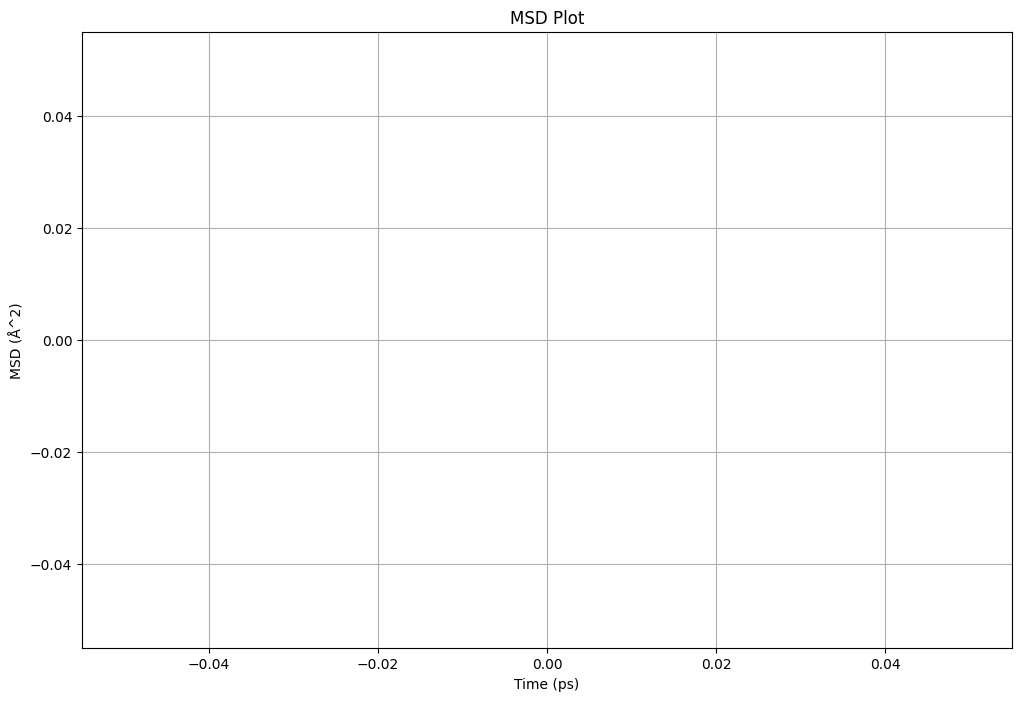

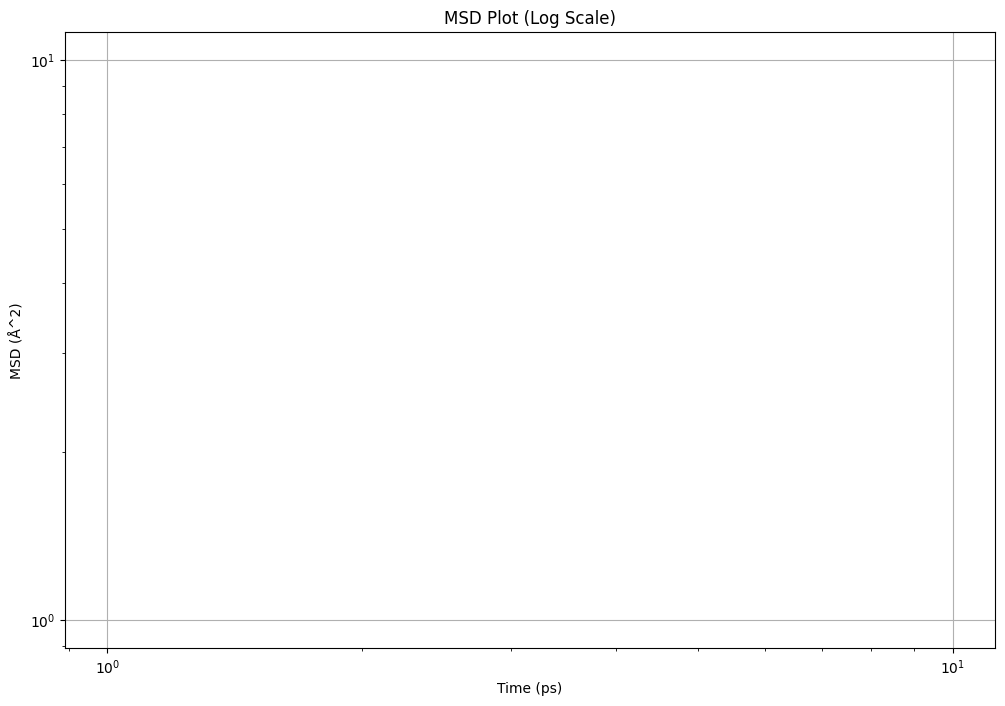

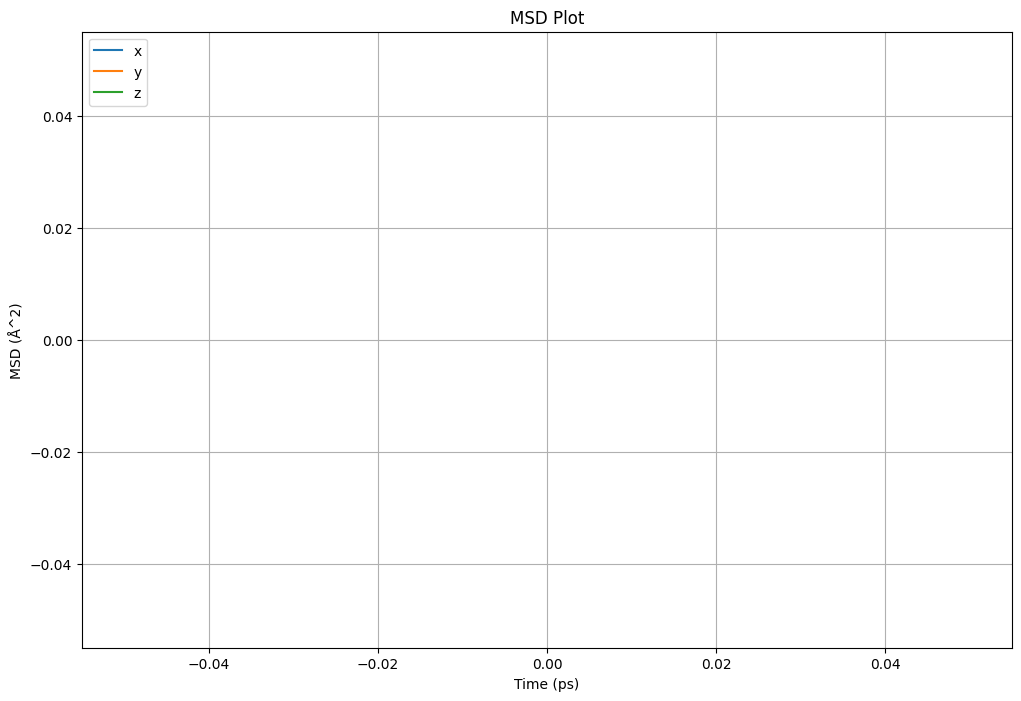

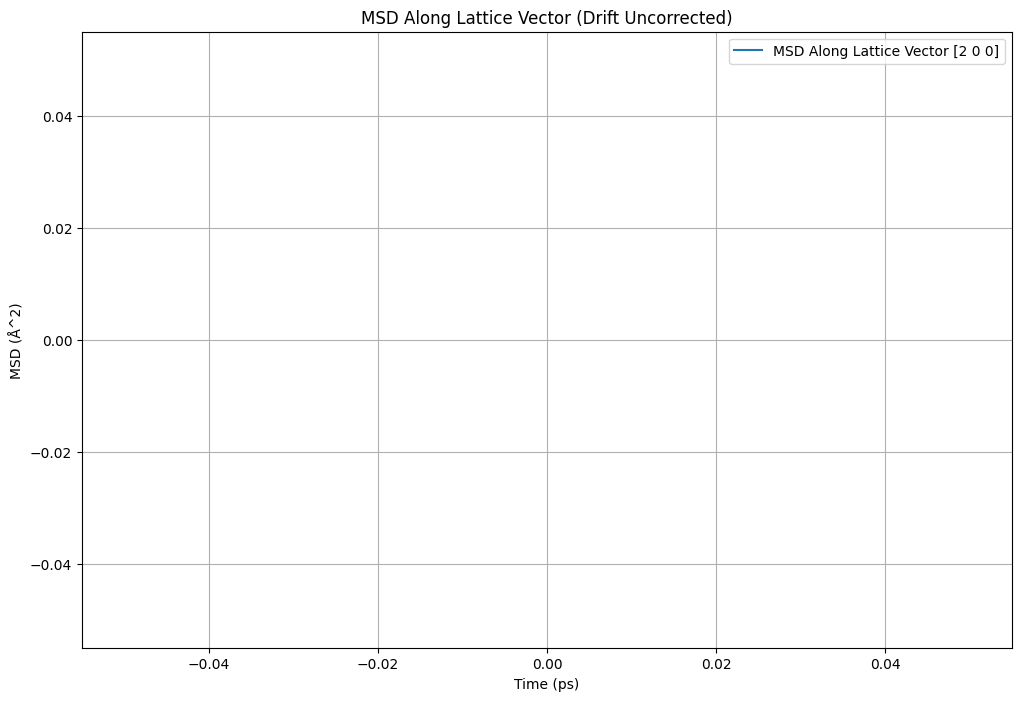

In [ ]:
msd_analysis = MSDAnalysis(traj)

# Assuming you have an instance of MSDAnalysis called 'msd_analysis'

# Calculate the 3D MSD
msd_3d = msd_analysis.calculate_msd(return_3d_msd=True)
fig1 = msd_analysis.plot_msd((msd_3d), title='MSD Plot', legend_loc='upper left', skip_points=4)
fig1_log = msd_analysis.plot_msd((msd_3d), title='MSD Plot (Log Scale)', legend_loc='upper left', skip_points=4, log_scale=True)


# Calculate the MSD for each direction (x, y, z)
msd_x, msd_y, msd_z = msd_analysis.calculate_msd(return_3d_msd=False)

# Plot the MSD for each direction
fig2 = msd_analysis.plot_msd((msd_x, msd_y, msd_z), labels=['x','y' ,'z'], title='MSD Plot', legend_loc='upper left', skip_points=4)
fig2.show()
# Calculate and plot the MSD along a non-normalized lattice vector for host atoms, correcting for framework drift
lattice_vector = np.array([2, 0, 0])  # Example non-normalized lattice vector
msd_along_lattice = msd_analysis.calculate_msd(lattice_vector = lattice_vector)
fig3 = msd_analysis.plot_msd(msd_along_lattice, labels=f'MSD Along Lattice Vector {lattice_vector}', title='MSD Along Lattice Vector (Drift Uncorrected)', skip_points=4)
fig3.show()


Calculating Van Hove: 100%|██████████| 159/159 [00:00<00:00, 3385250.44it/s]

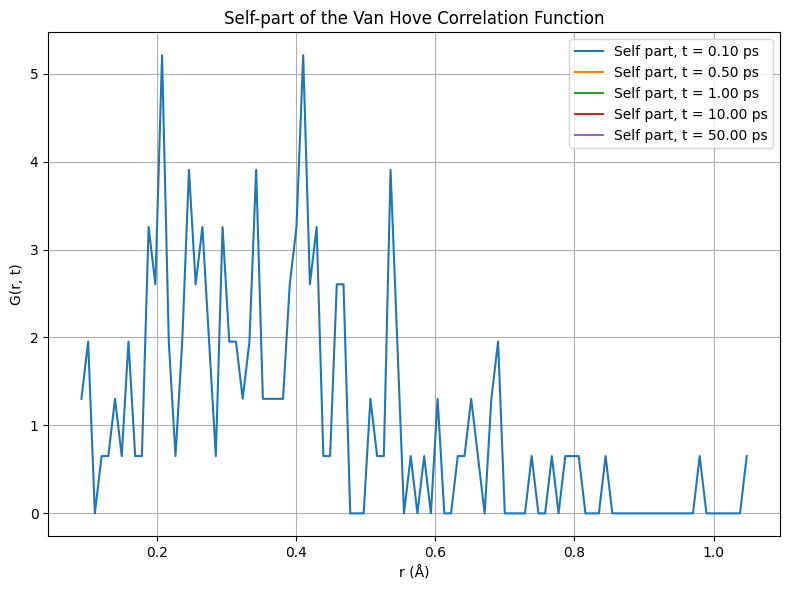

Calculating Van Hove: 100%|██████████| 159/159 [00:00<00:00, 3604834.25it/s]


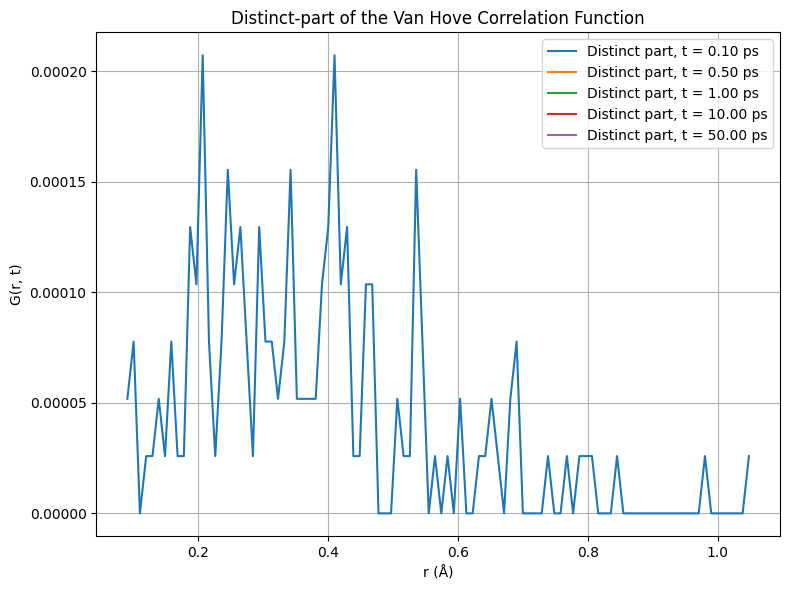

In [ ]:
from DiffusionAnalysis.analysis import VanHoveAnalysis
import numpy as np
import matplotlib.pyplot as plt


# Create a VanHoveAnalysis object
van_hove_analyzer = VanHoveAnalysis(traj)

# Set the parameters for the analysis
tau_values = [1, 5, 10, 100, 500]  # Time lags in number of timesteps
r_range = (0, 10)  # Range of distances to consider
n_bins = 100  # Number of bins for the histogram

self_data = []
for tau in tau_values:
    bin_centers, hist = van_hove_analyzer.calculate_van_hove(tau, r_range, n_bins,
                                                             mode='self', )
    self_data.append((bin_centers, hist, tau))

# Plot the self-part of the van Hove correlation function
self_fig = van_hove_analyzer.plot_van_hove(self_data, mode='self', title='Self-part of the Van Hove Correlation Function')
plt.show()

distinct_data = []
for tau in tau_values:
    bin_centers_distinct, hist_distinct = van_hove_analyzer.calculate_van_hove(tau, r_range, n_bins, mode='distinct')
    distinct_data.append((bin_centers_distinct, hist_distinct, tau))

# Plot the distinct-part of the van Hove correlation function
distinct_fig = van_hove_analyzer.plot_van_hove(distinct_data, mode='distinct', title='Distinct-part of the Van Hove Correlation Function')
plt.show()


Calculating tMSD:  10%|█         | 101/1000 [00:00<00:00, 52552.38it/s]
/Users/chrisdavies/Library/CloudStorage/OneDrive-Nexus365/PhD/DiffusionAnalysis/DiffusionAnalysis/analysis/tMSD_analysis.py:109: RuntimeWarning: invalid value encountered in divide
  exponents = np.diff(log_tMSD_values) / np.diff(log_time_lag_values)


ValueError: v cannot be empty

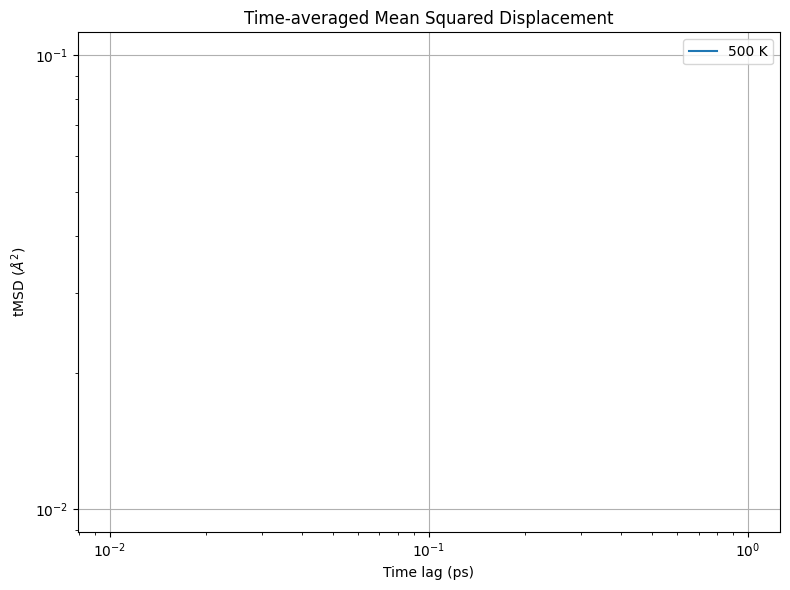

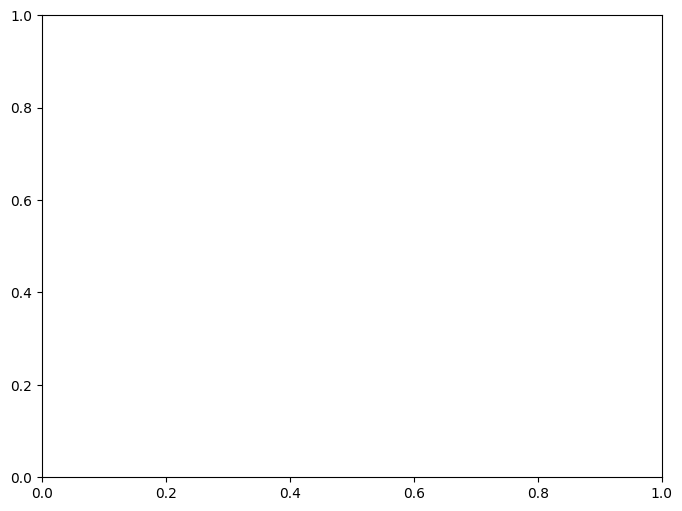

In [ ]:
from DiffusionAnalysis.analysis import tMSDAnalysis

# Create an instance of the tMSDAnalysis class
tmsd_analysis = tMSDAnalysis(traj)

# Define the minimum and maximum time lag values (in steps) and the number of points
min_tau = 1
max_tau = 1000
num_points = 1000

# Calculate tMSD
time_lag_values, tMSD_values = tmsd_analysis.calculate_tMSD(min_tau, max_tau, num_points)

# Plot the tMSD data
temperature = 500  # Example temperature value
label = f'{temperature} K'
fig = tmsd_analysis.plot_tMSD(time_lag_values, tMSD_values, label)

fig2 = tmsd_analysis.plot_tMSD_exponent(time_lag_values, tMSD_values, label, average_window_size=3) 




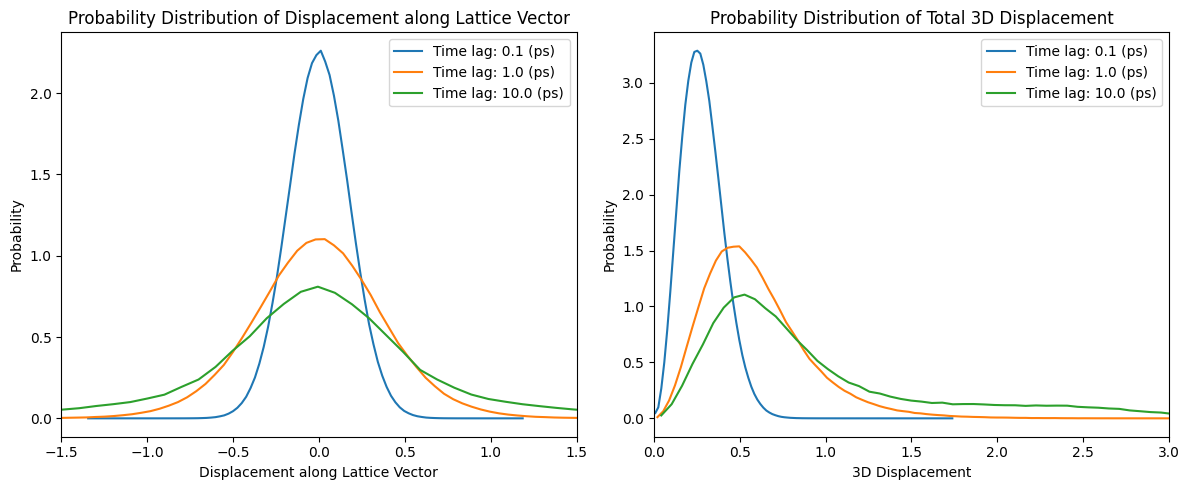

In [ ]:
from matplotlib import pyplot as plt

# Set the parameters
time_lags = [1, 10, 100]  # Example time lags
num_bins = 100
lattice_vector = np.array([1, 0, 0])  # Example lattice vector
time_unit = traj.time_unit.value
time_step = traj.timestep

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the probability distribution along the lattice vector
for time_lag in time_lags:
    # Calculate the displacement distribution along the lattice vector
    bin_centers, hist = msd_analysis.calculate_displacement_distribution(time_lag=time_lag, num_bins=num_bins,
                                                                         use_3d=False, lattice_vector=lattice_vector)

    # Plot the distribution
    ax1.plot(bin_centers, hist, label=f"Time lag: {time_lag*time_step} ({time_unit})")

# Set the axis labels and title for the lattice vector plot
ax1.set_xlabel(f"Displacement along Lattice Vector")
ax1.set_ylabel(r"Probability")
ax1.set_title("Probability Distribution of Displacement along Lattice Vector")
ax1.legend(loc='best')
ax1.set_xlim(-1.5,1.5)

# Plot the probability distribution of the total 3D displacement
for time_lag in time_lags:
    # Calculate the displacement distribution in 3D
    bin_centers, hist = msd_analysis.calculate_displacement_distribution(time_lag=time_lag, num_bins=num_bins,
                                                                         use_3d=True)

    # Plot the distribution
    ax2.plot(bin_centers, hist, label=f"Time lag: {time_lag*time_step} ({time_unit})")

# Set the axis labels and title for the 3D displacement plot
ax2.set_xlabel(f"3D Displacement")
ax2.set_ylabel(r"Probability")
ax2.set_title("Probability Distribution of Total 3D Displacement")
ax2.legend(loc='best')
ax2.set_xlim(0,3)


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()